In [1]:
!pip install -qU ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 106.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 91.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 104.8 MB/s eta 0:00:00


In [2]:
from ultralytics import SAM
import matplotlib.pyplot as plt

# load the model
model = SAM('sam2.1_b.pt')

# display model info
model.info()

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 154M/154M [00:04<00:00, 33.9MB/s]


Model summary: 403 layers, 80,850,178 parameters, 80,850,178 gradients


(403, 80850178, 80850178, 0.0)

In [3]:
# url - https://ultralytics.com/images/bus.jpg

SEGMENT IMAGE



In [10]:
from google.colab import files
uploaded = files.upload()


Saving test_image.jpg to test_image.jpg


In [11]:
image_path = "test_image.jpg"  # Name of the uploaded file
results = model(image_path, bboxes=bboxes)



image 1/1 /content/test_image.jpg: 1024x1024 1 0, 1505.1ms
Speed: 127.1ms preprocess, 1505.1ms inference, 124.0ms postprocess per image at shape (1, 3, 1024, 1024)


In [12]:
# define bounding box regions
bboxes = [[55, 400, 230, 900]]

image_path = 'test_image.jpg'
results = model(image_path, bboxes=bboxes)


image 1/1 /content/test_image.jpg: 1024x1024 1 0, 354.6ms
Speed: 9.5ms preprocess, 354.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


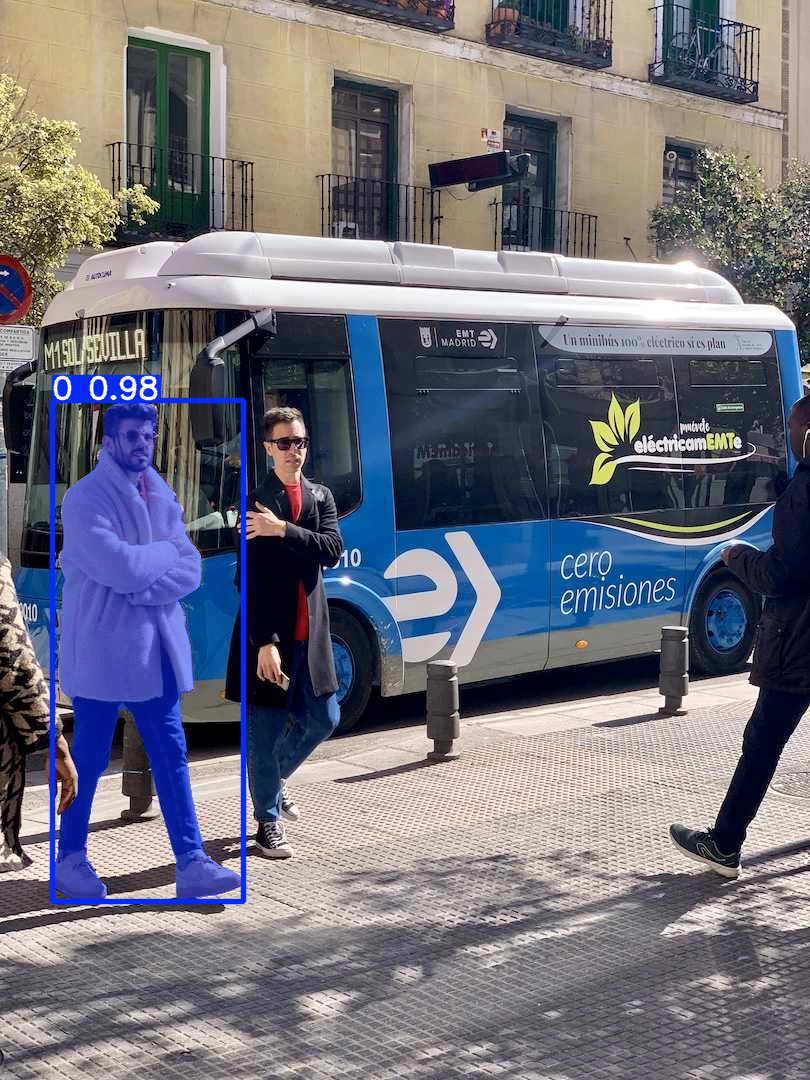

In [13]:
for result in results:
    result.show()

In [14]:
# define single points
points = [[350, 370]]
results = model(image_path, points=points, labels=[1])


image 1/1 /content/test_image.jpg: 1024x1024 1 0, 384.8ms
Speed: 11.8ms preprocess, 384.8ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)


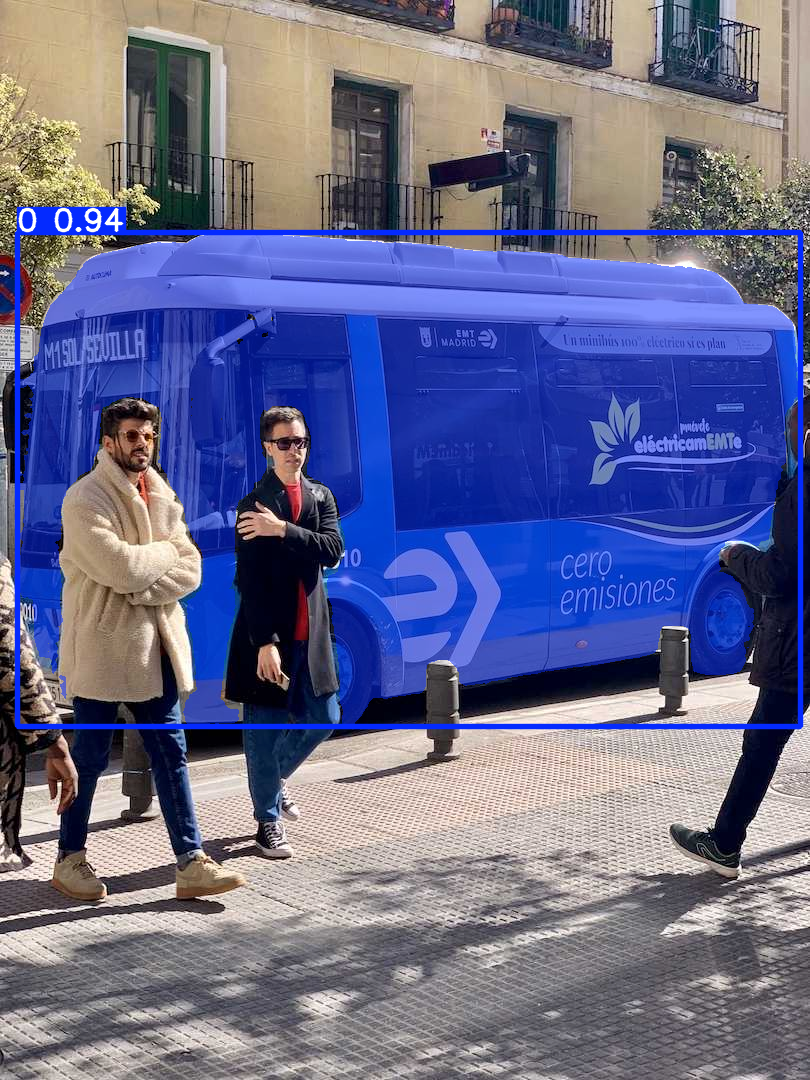

In [15]:
for result in results:
    result.show()

In [16]:
# define multiple points
points = [[350, 370], [100, 650]]
results = model(image_path, points=points, labels=[1, 0])


image 1/1 /content/test_image.jpg: 1024x1024 1 0, 1 1, 400.1ms
Speed: 9.2ms preprocess, 400.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)


## Extract BBox Image from the Original Image


In [17]:
import cv2
import torch
import numpy as np

In [18]:
result.boxes.xyxy

tensor([[ 17., 232., 800., 726.]], device='cuda:0')

Cropped Image 0_0


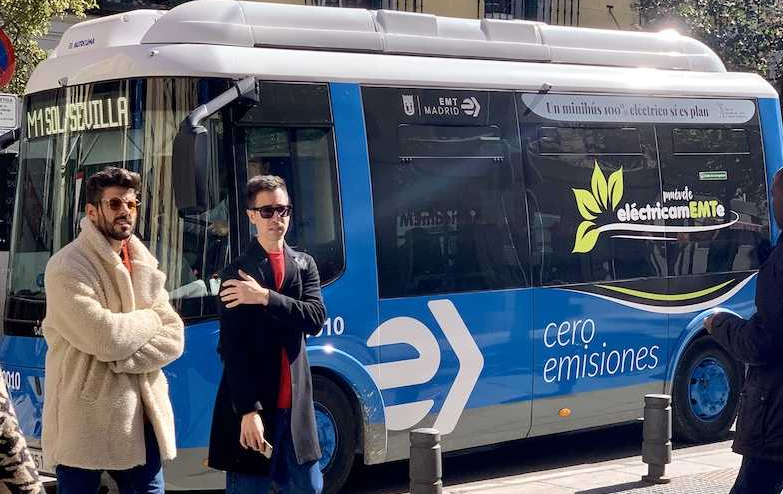

Cropped Image 0_1


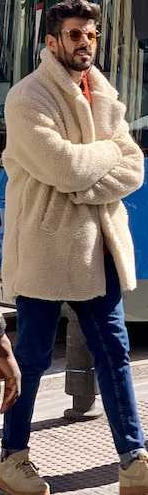

In [20]:
import cv2
import numpy as np
import torch
from google.colab.patches import cv2_imshow

image = cv2.imread(image_path)

for i, result in enumerate(results):
    if hasattr(result, 'boxes') and result.boxes is not None:
        boxes = result.boxes.xyxy.cpu().numpy() if isinstance(result.boxes.xyxy, torch.Tensor) else np.array(result.boxes.xyxy)

        # iterate through the bounding boxes
        for j, box in enumerate(boxes):
            x1, y1, x2, y2 = map(int, box[:4])

            cropped_img = image[y1:y2, x1:x2]

            # show the image in Colab
            print(f"Cropped Image {i}_{j}")
            cv2_imshow(cropped_img)


SEGMENT VIDEO

In [21]:
from ultralytics.models.sam import SAM2VideoPredictor

# define model parameters
overrides = dict(conf=0.25, task='segment', mode='predict', imgsz=1024, model='sam2.1_b.pt')

predictor = SAM2VideoPredictor(overrides=overrides)

In [23]:
from google.colab import files
uploaded = files.upload()


Saving test_video.avi to test_video.avi


In [25]:
video_path = 'test_video.avi'

results = predictor(source=video_path, points=[900, 820], labels=[1])


WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/58) /content/test_video.avi: 1024x1024 1 0, 622.5ms
video 1/1 (frame 2/58) /content/test_video.avi: 1024x1024 1 0, 395.4ms
video 1/1 (frame 3/58) /content/test_video.avi: 1024x1024 1 0, 386.0ms
video 1/1 (frame 4/58) /content/test_video.avi: 1024x1024 1 0, 414.5ms
video 1/1 (frame 5/58) /content/test_video.avi: 1024x1024 1 0, 449.5ms
video 1/1 (frame 6/58) /content/test_video.avi: 1024x1024 1 0, 486.2ms
video 1/1 (frame 7/58) /conten

In [26]:
import os

# Check what was saved
os.listdir('runs/segment/predict')


['test_video.avi']

In [27]:
from google.colab import files
files.download('runs/segment/predict/test_video.avi')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>